In [34]:
import math;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve;

<h3>Модель распространения FSPL</h3>

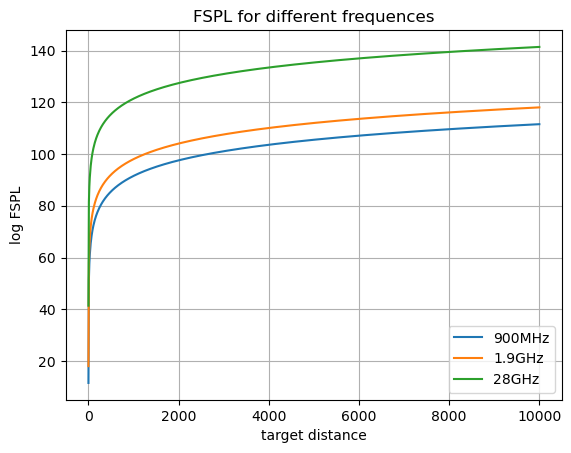

In [65]:
SPEED_OF_LIGHT = 299_792_458;
PREPARED_CONST = 20 * math.log10(4 * math.pi / SPEED_OF_LIGHT);

def FSPL(d, f):
    result = np.zeros(len(d));

    for i in range(len(d)):
        result[i] = PREPARED_CONST + 20 * math.log10(d[i] * f);

    return result;

FREQ_1 = 900_000_000;
FREQ_2 = 1_900_000_000;
FREQ_3 = 28_000_000_000;

DISTANCE = np.linspace(0.1, 10000, 1000);

plt.plot(DISTANCE, FSPL(DISTANCE, FREQ_1), label = "900MHz");
plt.plot(DISTANCE, FSPL(DISTANCE, FREQ_2), label = "1.9GHz");
plt.plot(DISTANCE, FSPL(DISTANCE, FREQ_3), label = "28GHz");
plt.xlabel("target distance");
plt.ylabel("log FSPL");
plt.legend();
plt.grid();
plt.title("FSPL for different frequences");

<h3>Дистанция уверенного приёма</h3>

In [66]:
import warnings;

TARGET_FSPL = 10 + 10 + 23 + 70;

warnings.filterwarnings("ignore", category = DeprecationWarning);
def findDistance(freq):
    return fsolve(lambda d: FSPL(d, freq) - TARGET_FSPL, x0 = 1000);

print("Для частоты %.1e Гц дистанция уверенного приёма равна %.2f м" %(FREQ_1, findDistance(FREQ_1)));
print("Для частоты %.1e Гц дистанция уверенного приёма равна %.2f м" %(FREQ_2, findDistance(FREQ_2)));
print("Для частоты %.1e Гц дистанция уверенного приёма равна %.2f м" %(FREQ_3, findDistance(FREQ_3)))

Для частоты 9.0e+08 Гц дистанция уверенного приёма равна 11840.45 м
Для частоты 1.9e+09 Гц дистанция уверенного приёма равна 5608.64 м
Для частоты 2.8e+10 Гц дистанция уверенного приёма равна 380.59 м


<h3>Стандартные модели распространения 3GPP</h3>

In [67]:
def UMaLoS(d, f):
    if not isinstance(d, np.ndarray):
        d = [d]
    
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = 28 + 22 * math.log10(d[i]) + 20 * math.log10(f);
    return result;

BASE_ST_HEIGHT = 25;

def UManLoS(d, f):
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = max(UMaLoS(d[i], f), 13.54 + 39.08 * math.log10(d[i]) + 20 * math.log10(f) - 0.6 * (BASE_ST_HEIGHT - 1.5));
    return result;

def InHOfficeLoS(d, f):
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = 32.4 + 17.3 * math.log10(d[i]) + 20 * math.log10(f);
    return result;

def InHOfficeNLoS(d, f):
    result = np.zeros(len(d));
    for i in range(len(d)):
        result[i] = 38.3 + 24.9 * math.log10(d[i]) + 20 * math.log10(f);
    return result;

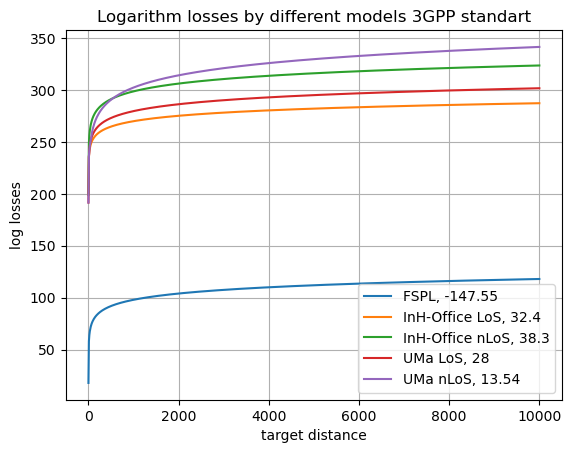

In [70]:
plt.plot(DISTANCE, FSPL(DISTANCE, FREQ_2), label = "FSPL, -147.55");
plt.plot(DISTANCE, InHOfficeLoS(DISTANCE, FREQ_2), label = "InH-Office LoS, 32.4");
plt.plot(DISTANCE, InHOfficeNLoS(DISTANCE, FREQ_2), label = "InH-Office nLoS, 38.3");
plt.plot(DISTANCE, UMaLoS(DISTANCE, FREQ_2), label = "UMa LoS, 28");
plt.plot(DISTANCE, UManLoS(DISTANCE, FREQ_2), label = "UMa nLoS, 13.54");
plt.xlabel("target distance");
plt.ylabel("log losses");
plt.legend();
plt.grid();
plt.title("Logarithm losses by different models 3GPP standart");